# AST121 - Hubble Law Plot

Initial setups including imports, helper functions, and path of csv:


In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

PHYSICAL_DIAMETER = 22 # kpc

def approx_small_angle_in_mega(diameter: float, angular_size: float) -> float: # d (dist to galaxy) = D (diameter of galaxy) / theta
    return diameter / angular_size # kpc / mrad * 10**6 cancels out

path = "./HubbleLaw.csv"

Loading the data from HubbleLaw.csv:

In [2]:
data = np.zeros(shape=(0, 5))

with open(path, mode='r', newline='') as file:
    csv_reader = csv.reader(file)

    for row in csv_reader:
        data.reshape(1, -1)
        data = np.vstack((data, row))

data

array([['0', 'GalaxyMeanSize', 'GalaxySdevSize', 'GalaxyMeanVel',
        'GalaxySdevVel'],
       ['NGC 3623', '2.0168', '0.39040461062851184', '617.066',
        '640.0652265386708'],
       ['NGC 3368', '1.1514', '0.4570346157568374', '1274.852',
        '253.5759129254985'],
       ['NGC 2903', '3.850454545454546', '5.575235883532175',
        '360.7263636363636', '117.61981715160442'],
       ['NGC 1832', '0.7044285714285715', '0.10890475149395083',
        '889.6680428571427', '1545.6930233755656'],
       ['NGC 3227', '1.075', '0.22699999999999992', '1372.4365',
        '192.26350000000002'],
       ['NGC 3627', '2.19278', '0.6758065652241032', '966.6360000000001',
        '362.3656365937587'],
       ['NGC 6181', '0.5486', '0.11189566568906947',
        '2441.3839999999996', '62.2918311177316'],
       ['NGC 3034', '3.6640909090909095', '3.7953979897800507',
        '179.24272727272725', '55.930311035805836'],
       ['NGC 2276', '0.6872857142857143', '0.034693409360586416',
  

Obtain distances in Mpc:

In [ ]:
distances = []
for i, angular_size in enumerate(data[1:, 1]):
    distances.append(approx_small_angle_in_mega(PHYSICAL_DIAMETER, float(angular_size)))

distances = np.array(distances, dtype=float)
distances

array([10.90836969, 19.10717388,  5.71361114, 31.23098763, 20.46511628,
       10.03292624, 40.10207802,  6.00421784, 32.00997714, 36.97478992,
       32.67973856, 43.66812227, 27.65591019, 27.47546833, 46.85835996])

Obtain velocities in km/s:

In [ ]:
velocities = np.array(data[1:, 3], dtype=float)
velocities

array([ 617.066     , 1274.852     ,  360.72636364,  889.66804286,
       1372.4365    ,  966.636     , 2441.384     ,  179.24272727,
       1000.37397143, 1538.19      , 1575.606     , 2380.188     ,
       1807.33863636,  619.52942857, 1267.27      ])

Obtain the approximated slope using NumPy's polyfit, we can see that the value is around 35.97 km s^-1 Mpc^-1:

In [ ]:
slope, intercept = np.polyfit(distances, velocities, 1)

slope

35.967780719873154

The value is around half the Hubble's value (~ 70 km s^-1 Mpc^-1). This might be due to the fact that the dataset only looks into limited amount of galaxies.

Find the uncertainty using standard deviation of angular size (i.e. if the angular size was mean value + standard deviation):

In [ ]:
uncertainty_dists = []

for i in range(1, len(data[:, 1])):
    uncertainty_dists.append(approx_small_angle_in_mega(PHYSICAL_DIAMETER, float(data[i, 1]) + float(data[i, 2])))

uncertainty_dists = np.array(uncertainty_dists, dtype=float)
uncertainty_dists

array([ 9.13923142, 13.67789513,  2.33404653, 27.04918067, 16.89708141,
        7.66928224, 33.3083185 ,  2.94926372, 30.47179521, 34.81012658,
       23.10748878, 38.78907391, 19.24071179, 22.49763317, 43.22200393])

Now, let's calculate errors for distance:

In [ ]:
dist_errors = abs(uncertainty_dists - distances)
dist_errors

array([1.76913828, 5.42927874, 3.37956462, 4.18180696, 3.56803487,
       2.363644  , 6.79375952, 3.05495412, 1.53818193, 2.16466333,
       9.57224978, 4.87904836, 8.4151984 , 4.97783517, 3.63635603])

Now calculate errors for velocity, we can directly use standard deviation:

In [ ]:
vel_errors = np.array(data[1:, 4], dtype=float)
vel_errors

array([ 640.06522654,  253.57591293,  117.61981715, 1545.69302338,
        192.2635    ,  362.36563659,   62.29183112,   55.93031104,
       1775.38617045,   55.71      ,  621.59177451,  185.34552537,
       1146.01948236, 1128.69454729,    3.63      ])

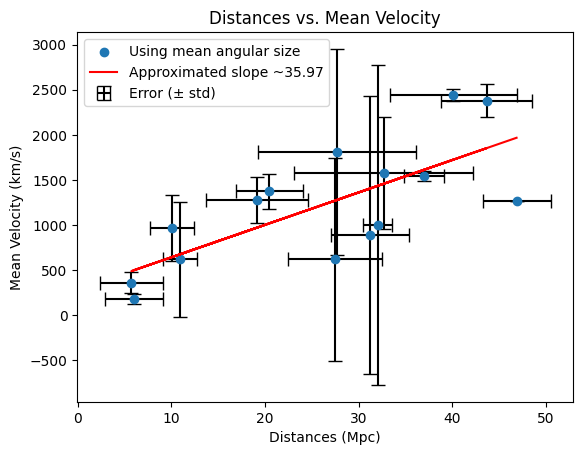

In [ ]:
# Plot the points (mean distance, mean velocity)
plt.scatter(distances, velocities, label='Using mean angular size')

# Plot Error Bar
plt.errorbar(distances, velocities, xerr=dist_errors, yerr=vel_errors, fmt='none', color='black', capsize=5, label='Error (± std)', zorder=-1)

# Visualize the slope
velocities_trend = slope * distances + intercept
plt.plot(distances, velocities_trend, color='red', label=('Approximated slope ~' + str(round(slope, 2))))

plt.xlabel('Distances (Mpc)')
plt.ylabel('Mean Velocity (km/s)')
plt.title('Distances vs. Mean Velocity')
plt.legend()
plt.show()

Graph without error bars:

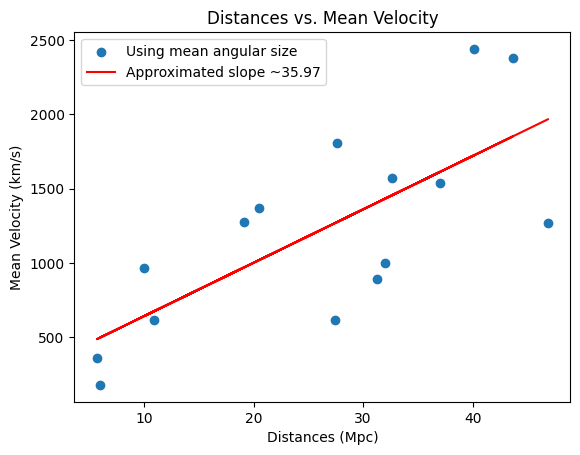

In [ ]:
# Plot the points (mean distance, mean velocity)
plt.scatter(distances, velocities, label='Using mean angular size')

# Visualize the slope
velocities_trend = slope * distances + intercept
plt.plot(distances, velocities_trend, color='red', label=('Approximated slope ~' + str(round(slope, 2))))

plt.xlabel('Distances (Mpc)')
plt.ylabel('Mean Velocity (km/s)')
plt.title('Distances vs. Mean Velocity')
plt.legend()
plt.show()